<a href="https://colab.research.google.com/github/ELiTE0005/DeepLearningTechniques/blob/main/week10_msint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Autoencoder Training...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.3336 - val_loss: 0.1502
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1429 - val_loss: 0.1232
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1209 - val_loss: 0.1110
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1110 - val_loss: 0.1046
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1050 - val_loss: 0.1008
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1012 - val_loss: 0.0981
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0987 - val_loss: 0.0965
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0972 - val_loss: 0.0949
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0952 - val_loss: 0.0937
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0947 - val_loss: 0.0929
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0938 - val_loss: 0.0922
Epoch 1

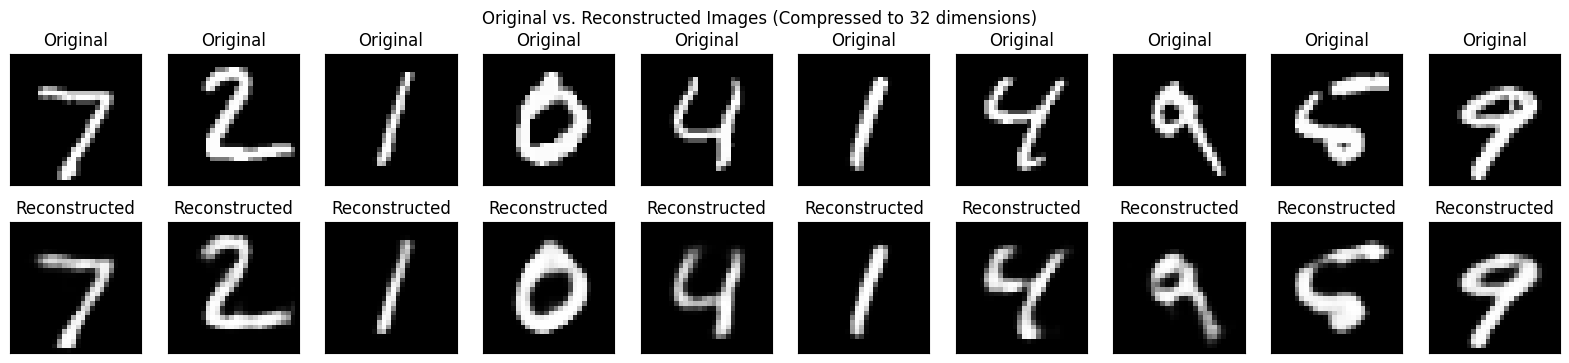

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Original image size: 784 dimensions
Compressed vector size: 32 dimensions


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt


# Load MNIST data
(X_train, _), (X_test, _) = mnist.load_data()


# Preprocessing: Normalize and flatten the images
# Input size is 28x28 = 784
original_dim = np.prod(X_train.shape[1:])


X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


# Flatten the images from 28x28 to 784-element vectors
X_train_flat = X_train.reshape((len(X_train), original_dim))
X_test_flat = X_test.reshape((len(X_test), original_dim))


# The size of the compressed representation (the bottleneck)
encoding_dim = 32  # 32 is much smaller than 784, achieving ~96% reduction


# 1. Define the Input Layer
input_img = Input(shape=(original_dim,))


# 2. ENCODER (Compression)
encoded = Dense(128, activation='relu')(input_img)
# The Bottleneck: The compressed representation
bottleneck = Dense(encoding_dim, activation='relu')(encoded)


# 3. DECODER (Decompression/Reconstruction)
decoded = Dense(128, activation='relu')(bottleneck)
# Output must match input dimension (784)
output_img = Dense(original_dim, activation='sigmoid')(decoded)
# Use 'sigmoid' to squash the output between 0 and 1, matching the normalized input.


# Create the full Autoencoder model
autoencoder = Model(input_img, output_img)


# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


print("Starting Autoencoder Training...")


# Train the model
# Input data is X_train_flat, and target output data is also X_train_flat
autoencoder.fit(X_train_flat, X_train_flat,
                epochs=50,        # Autoencoders often require more epochs
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_flat, X_test_flat))


print("Training Complete.")


# Generate the reconstructed images
reconstructed_imgs = autoencoder.predict(X_test_flat)


n = 10  # How many images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_flat[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display Reconstruction (Compressed and Decompressed)
    ax = plt.subplot(2, n, i + 1 + n)
    # The reconstructed image is also a 784-vector, so we reshape it back to 28x28
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle(f"Original vs. Reconstructed Images (Compressed to {encoding_dim} dimensions)")
plt.show()


# Create a separate model using only the input and the bottleneck layer
encoder_model = Model(input_img, bottleneck)


# Use the encoder to get the compressed representation of the first test image
compressed_vector = encoder_model.predict(X_test_flat[0].reshape(1, original_dim))


print(f"Original image size: {original_dim} dimensions")
print(f"Compressed vector size: {compressed_vector.shape[1]} dimensions")
# print(f"Compressed vector:\n{compressed_vector[0]}")

